<h1 style="text-align:center; font-size:32px; font-weight:bold;">
Notre objectif est d'utiliser les données pour prédire si une personne développera une maladie cardiaque.
</h1>

---
# **Observation of Variables**

| Variable | Description |
|---------|-------------|
| **patientid** | Unique ID of each patient |
| **age** | Age of the patient |
| **gender** | Biological sex (male = 1 /female = 0) |
| **chestpain** | Type and intensity of chest pain (0,1,2,3) |
| **restingBP** | Resting blood pressure (94-200) |
| **serumcholestrol** | Blood cholesterol level (126-564)|
| **fastingbloodsugar** | Fasting blood sugar level (true if > 120 mg/dl , otherwise false)|
| **restingelectro** | Resting ECG results (0,1,2)|
| **maxheartrate** | Maximum heart rate achieved(71-202) |
| **exerciseangia** | Exercise-induced angina (yes = 1,no = 0)|
| **oldpeak** | ST-segment deviation from resting values (0-6.2)|
| **slope** | Slope of the ST segment during exercise (1 - upslopping,2 - flat, 3 - downslopping)|
| **noofmajorvessels** | Number of major vessels visualized (0,1,2,3) |
| **target** | Presence of heart disease (0 = absence , 1 = presense)|
---

In [118]:
sns.reset_defaults()
plt.rcdefaults()

## **Importing libraries**

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import joblib

## **Importing data**

In [120]:
data = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


# **DATA CLEANING**
## **There we are doing:**
- searching for slope which is not 1,2,3
- substituting it with nan
- then changing nan variables with median

In [122]:
data[(data["slope"] < 1) | (data["slope"] > 3)]

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
12,223295,27,1,0,129,135,0,1,192,1,1.0,0,0,0
19,260870,35,1,0,127,269,0,0,87,1,3.8,0,1,0
25,390931,71,1,1,101,352,0,1,183,0,3.6,0,0,0
26,390988,46,1,0,198,253,0,0,199,1,2.1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,9736370,65,1,0,125,346,0,1,93,1,3.9,0,0,0
988,9870657,74,1,0,136,279,0,1,122,0,1.2,0,0,0
991,9896438,24,1,0,170,354,0,0,90,1,1.5,0,0,0
994,9937998,62,1,1,125,342,0,0,128,1,2.1,0,0,0


In [123]:
data["slope"] = data["slope"].replace(0, np.nan)

data["slope"] = data["slope"].fillna(data["slope"].median())

In [124]:
data["slope"].isna().sum()

0

## **There:**
- we are changing 0 cholestrol level by doing interpolation
- since interpolation misses some variables,we are substituting them by median

In [125]:

data["serumcholestrol"] = data["serumcholestrol"].replace(0, np.nan)

# 2. Заполняем пропуски медианой, рассчитанной ОТДЕЛЬНО для каждой группы гендера
# Предполагаем, что колонка с полом называется 'gender' (или замени на 'sex', если она так называется)
data["serumcholestrol"] = data["serumcholestrol"].fillna(
    data.groupby("gender")["serumcholestrol"].transform("median")
)

# Проверка: смотрим, остались ли пустые значения
print("Осталось пропусков:", data["serumcholestrol"].isnull().sum())

Осталось пропусков: 0


In [126]:
data["serumcholestrol"].isna().sum()

0

# **DATA ANALYSIS**

## **Distribution of target value**

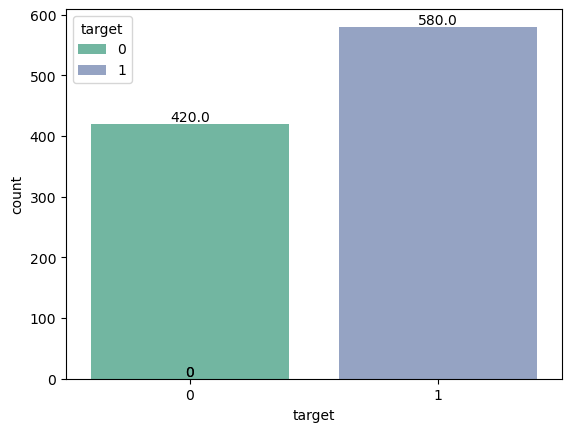

In [127]:

ax = sns.countplot(
    data=data,
    x="target",
    hue="target",
    palette={0: "#66c2a5", 1: "#8da0cb"}
)

for p in ax.patches:
    ax.annotate(
        p.get_height(),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )

plt.show()


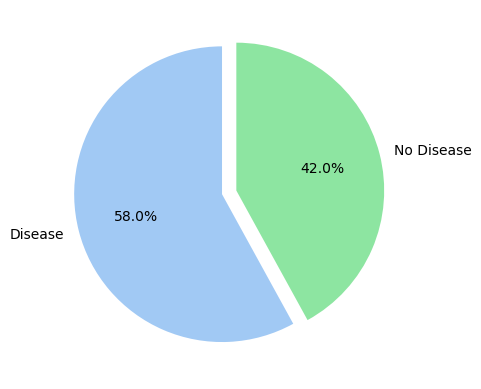

In [128]:
tada = data['target'].value_counts()
labels = ["Disease", "No Disease"]
explode = [0.0, 0.1]
colors = sns.color_palette('pastel6')

plt.pie(tada,labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.show()

## **Dropping patientid column since we don't need it**

In [129]:
data = data.drop(columns=["patientid"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   float64
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   float64
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 101.7 KB


## **Dividing our features**

In [130]:
numerical_features = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
categorical_features = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']
target = 'target'

## **Observing distribution of numerical features by target**

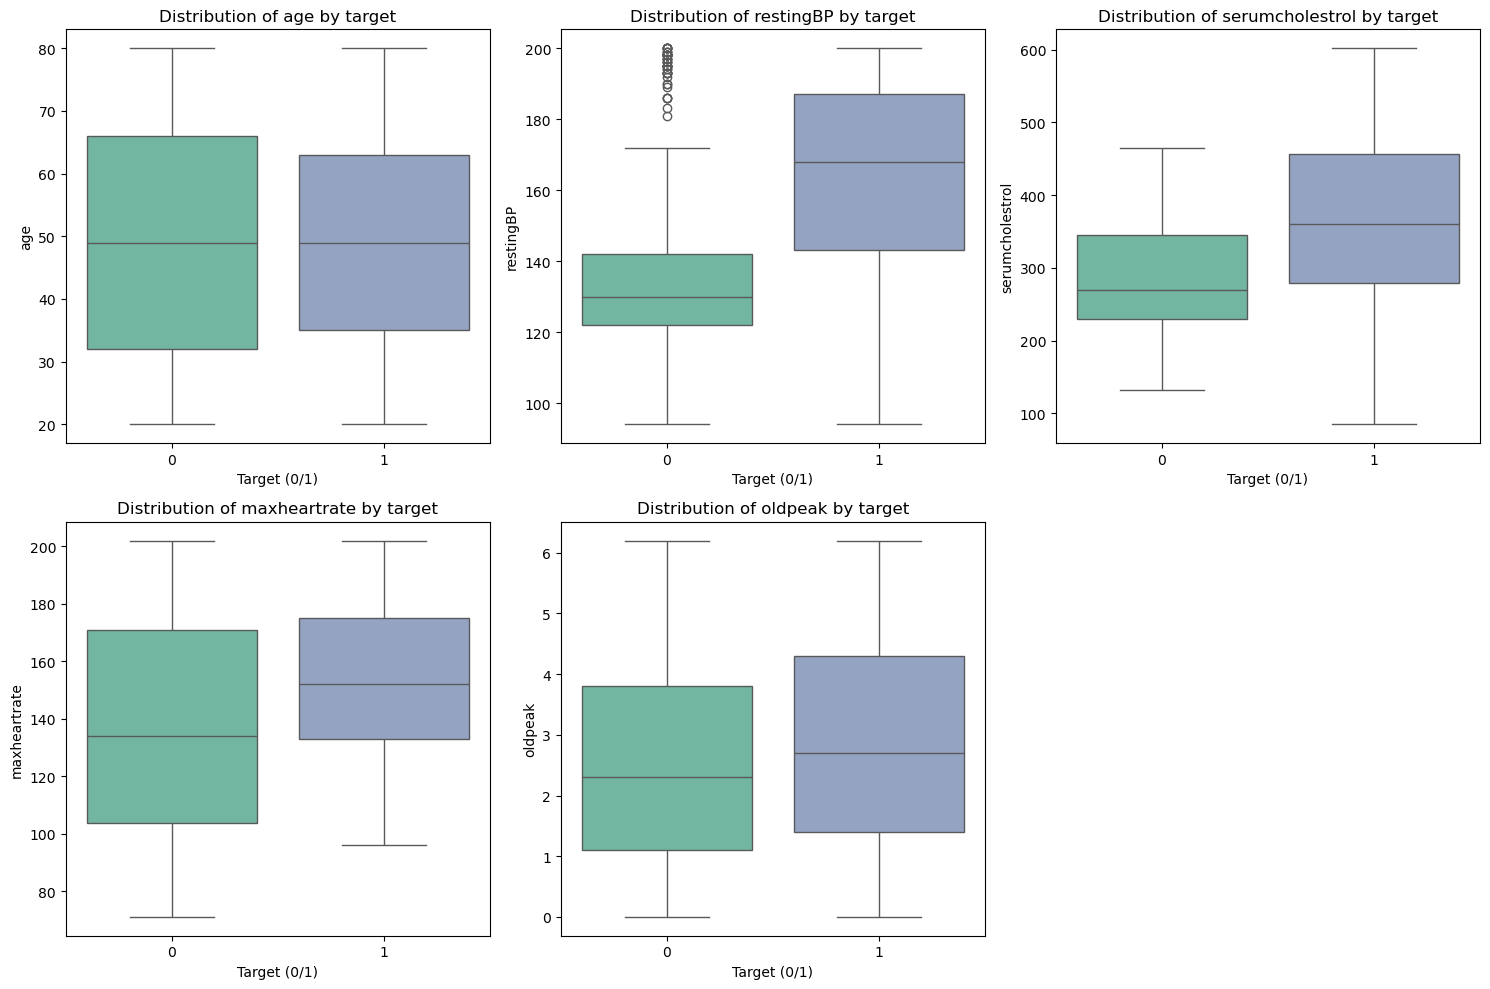

In [131]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=target, y=feature, data=data, palette={1: "#8da0cb" , 0: "#66c2a5"}, hue=target, legend=False)
    
    plt.title(f'Distribution of {feature} by target', fontsize=12)
    plt.xlabel('Target (0/1)', fontsize=10)
    plt.ylabel(feature, fontsize=10)

plt.tight_layout()
plt.show()

## Гипотезы с возрастом есть влияние или нет

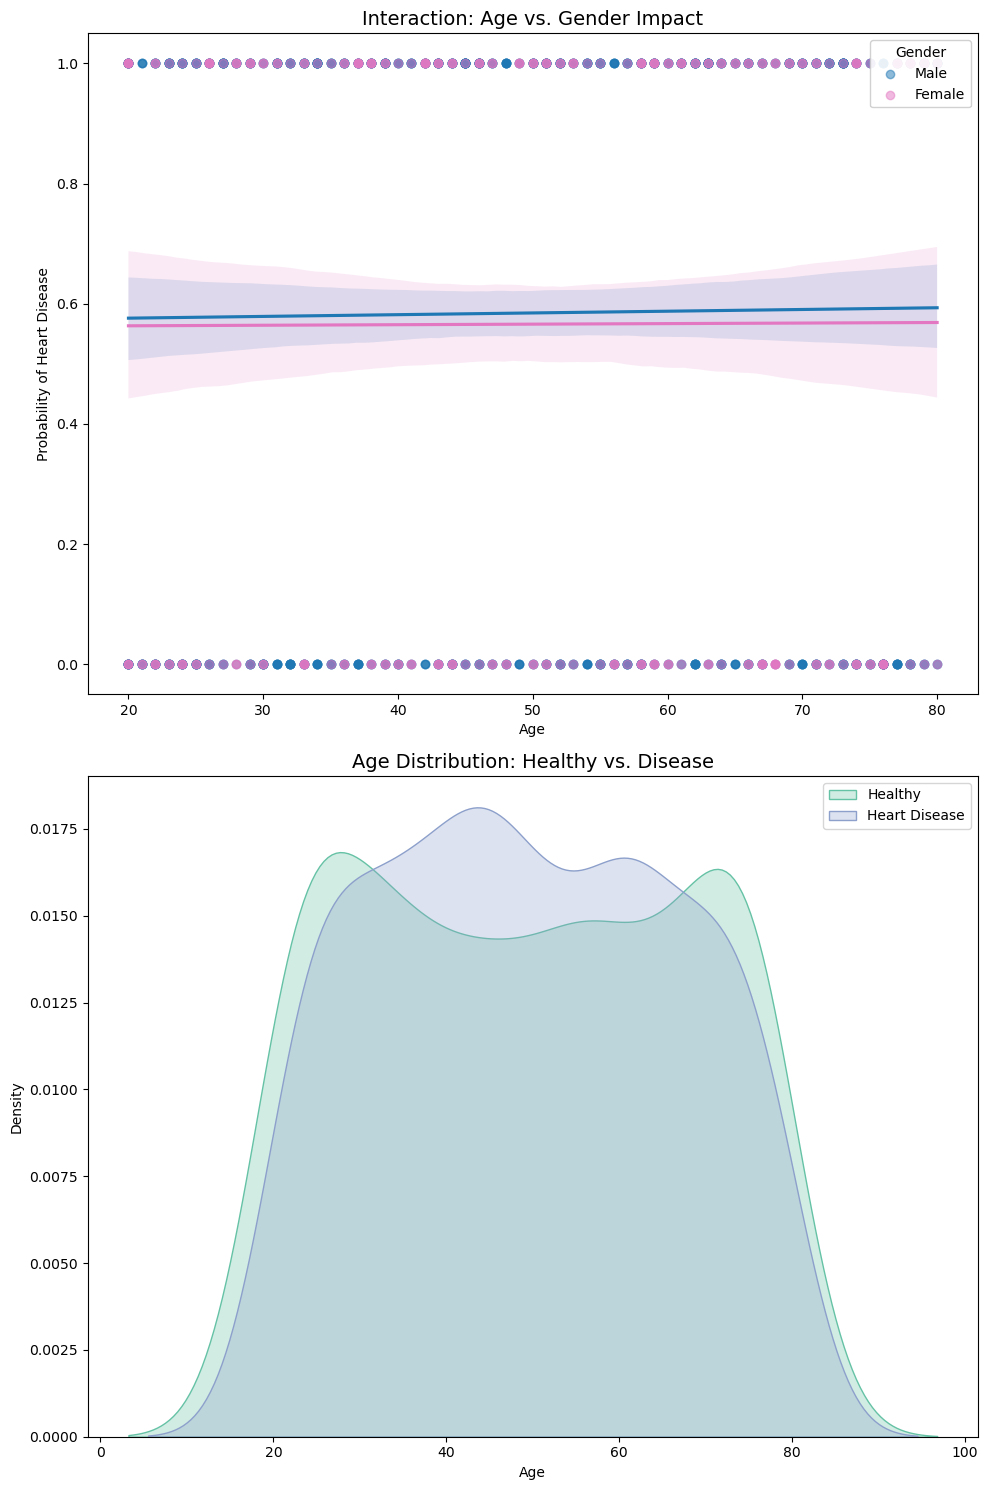

In [132]:
df_analysis = data.copy()

df_analysis['gender_label'] = df_analysis['gender'].map({1: 'Male', 0: 'Female'})

fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# PLOT 1: Age x Gender Interaction --
colors = {'Male': 'tab:blue', 'Female': 'tab:pink'}
for gender, color in colors.items():
    subset = df_analysis[df_analysis['gender_label'] == gender]
    sns.regplot(x='age', y='target', data=subset, ax=axes[0], 
                scatter_kws={'alpha':0.5}, label=gender, color=color, logistic=True)

axes[0].set_title('Interaction: Age vs. Gender Impact', fontsize=14)
axes[0].set_ylabel('Probability of Heart Disease')
axes[0].set_xlabel('Age')
axes[0].legend(title='Gender', loc='upper right', frameon=True, fancybox=True, framealpha=0.9)

# PLOT 2: Age Distribution Density ---
sns.kdeplot(data=df_analysis[df_analysis['target'] == 0]['age'], label='Healthy', fill=True, color='#66c2a5', alpha=0.3, ax=axes[1])
sns.kdeplot(data=df_analysis[df_analysis['target'] == 1]['age'], label='Heart Disease', fill=True, color='#8da0cb', alpha=0.3, ax=axes[1])

axes[1].set_title('Age Distribution: Healthy vs. Disease', fontsize=14)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()

## **Distribution of categorical features by target**

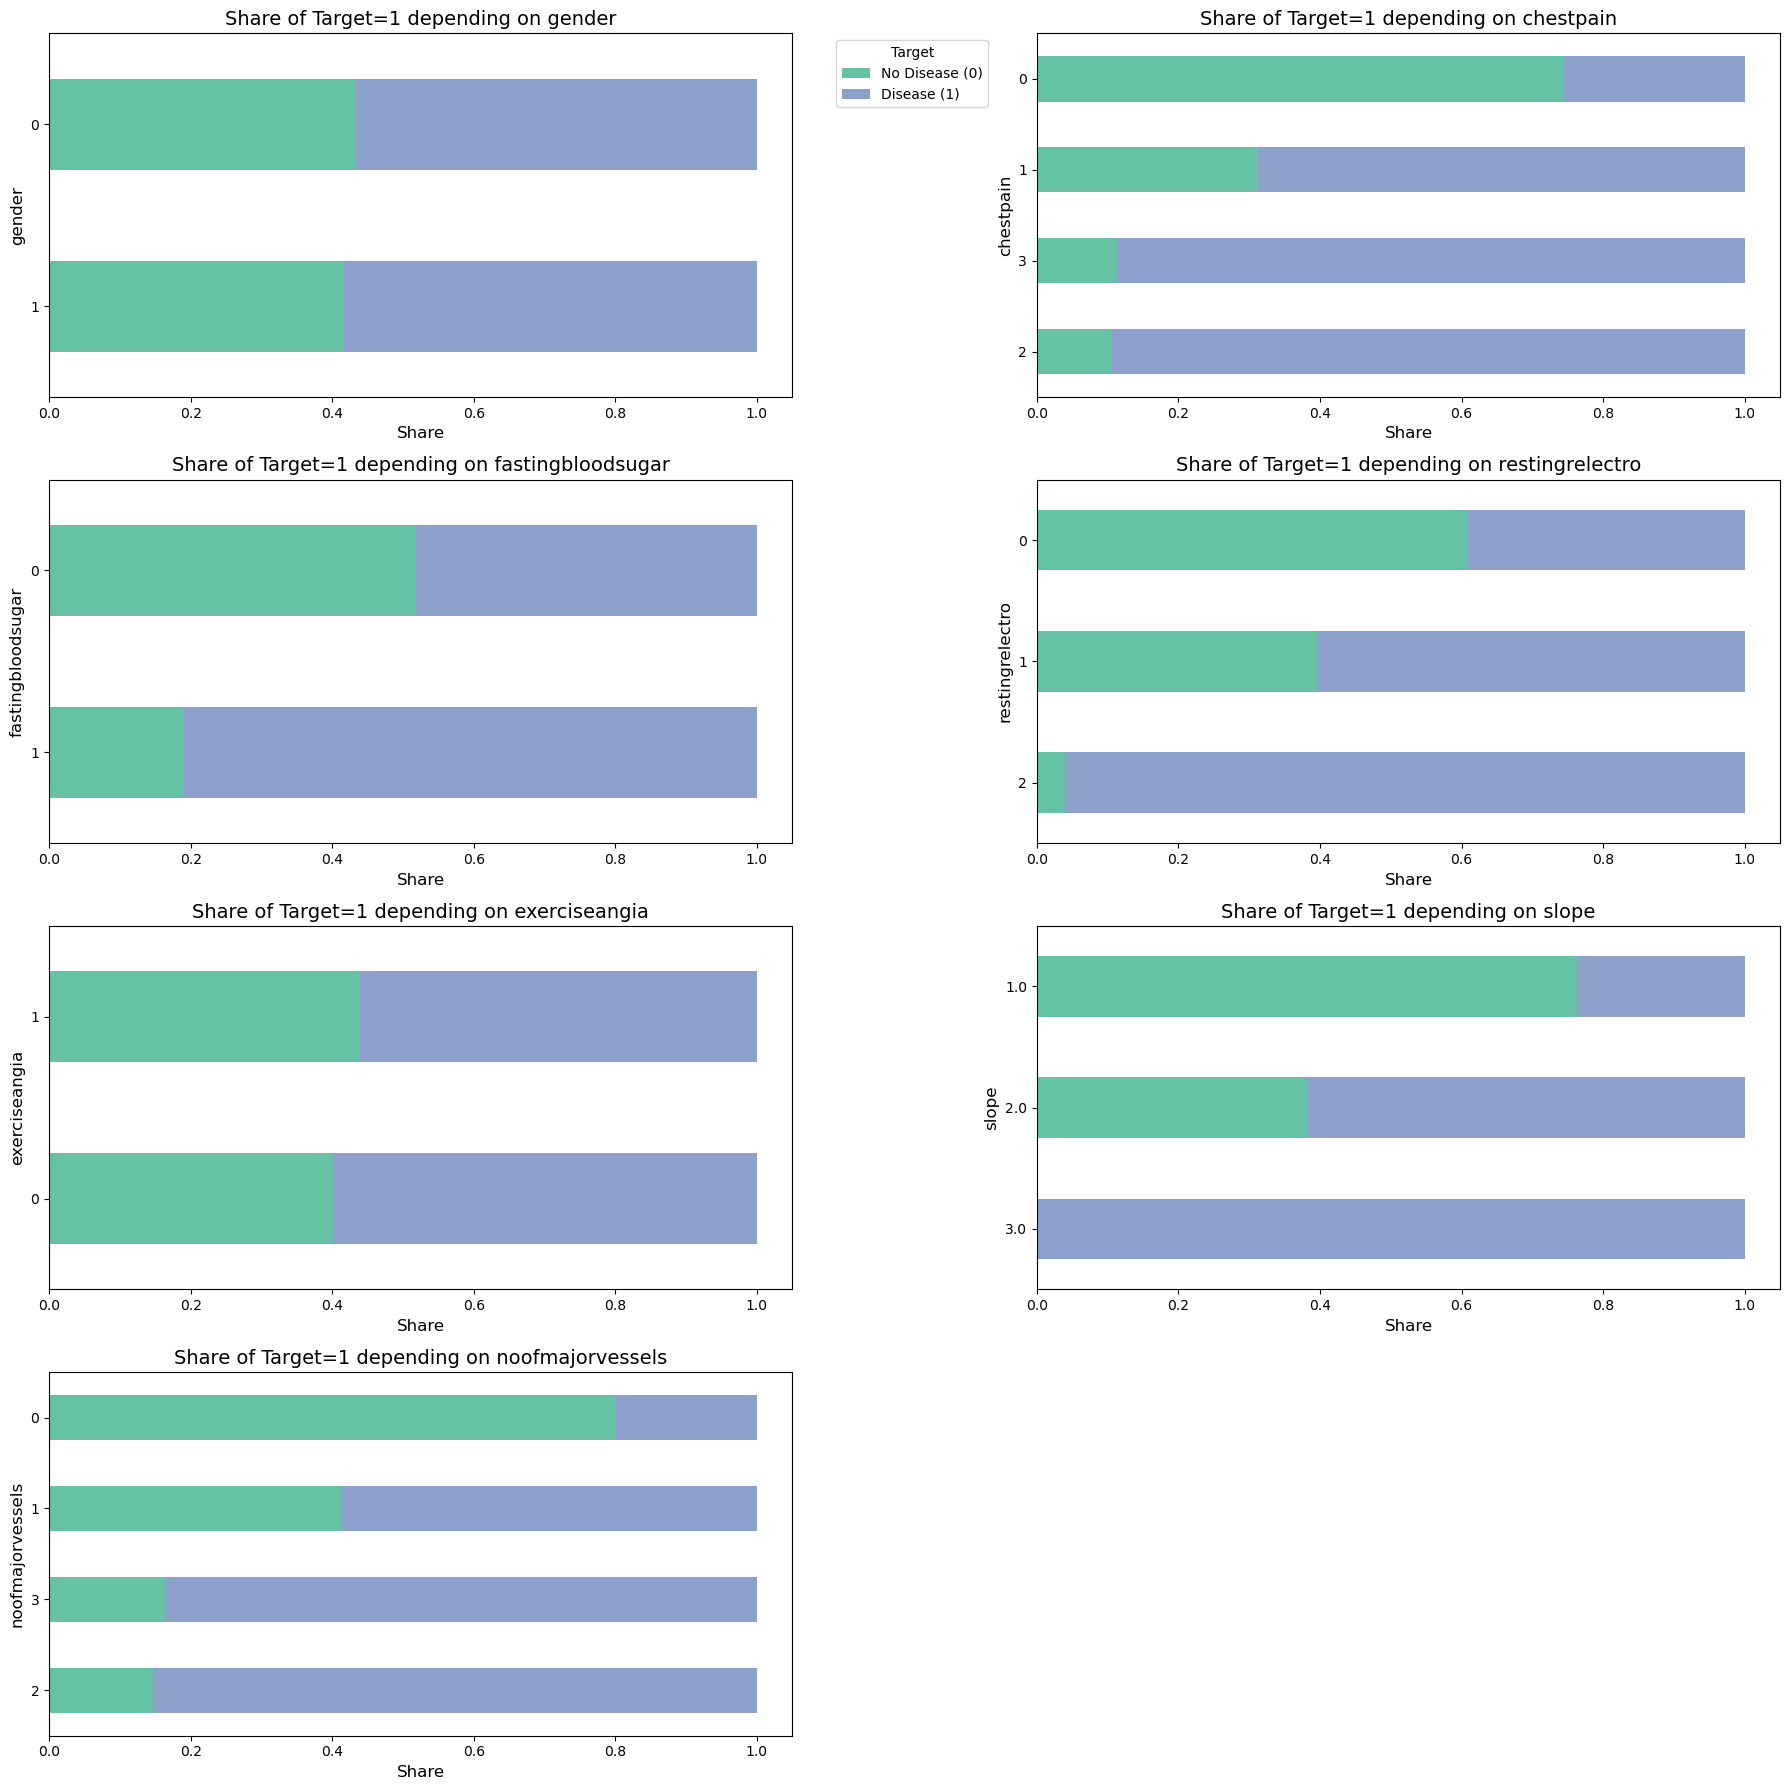

In [133]:
plt.figure(figsize=(18, 18))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    
    counts = data.groupby([feature, target]).size().unstack(fill_value=0)
    
    totals = counts.sum(axis=1)
    proportions = counts.div(totals, axis=0)

    proportions_sorted = proportions.sort_values(by=1, ascending=False)
    proportions_sorted.plot(kind='barh', stacked=True, color=['#66c2a5', "#8da0cb"], ax=plt.gca())
    
    plt.title(f'Share of Target=1 depending on {feature}', fontsize=14)
    plt.xlabel('Share', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    if i == 0:
        plt.legend(title='Target', labels=['No Disease (0)', 'Disease (1)'], bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

## **Observing correlation matrix**

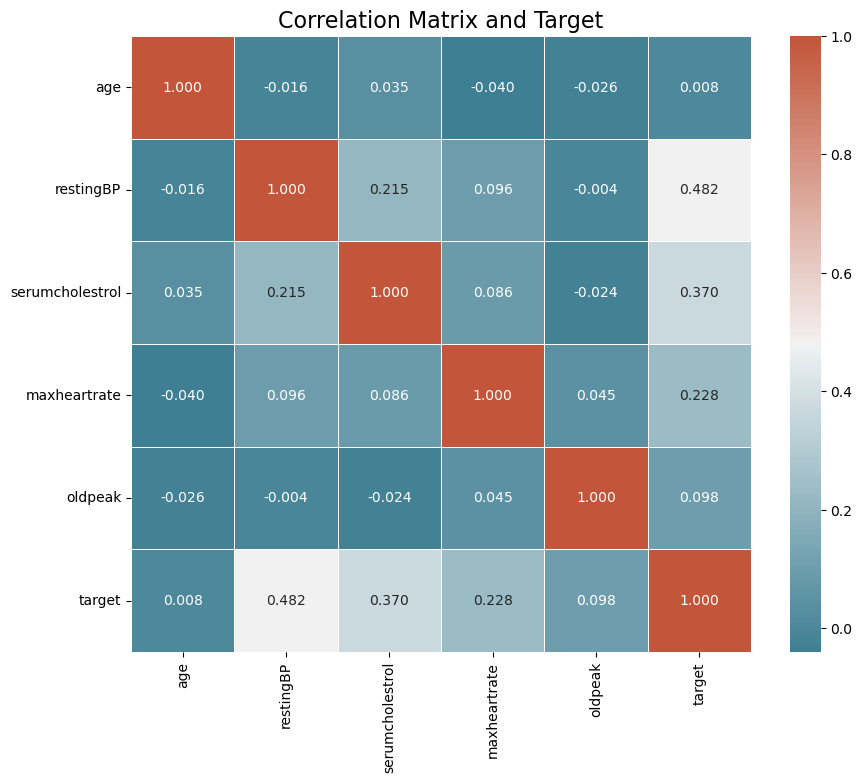

In [134]:
features_for_corr = [
    'age', 
    'restingBP', 
    'serumcholestrol', 
    'maxheartrate', 
    'oldpeak', 
    'target'
]

correlation_matrix = data[features_for_corr].corr()

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(
    correlation_matrix,
    annot=True,      
    cmap=cmap,    
    fmt=".3f",          
    linewidths=.5,      
    cbar=True           
)

plt.title('Correlation Matrix and Target', fontsize=16)
plt.show()

## **Visualization: Pair Plot of Selected Numerical Features**
### The following pair plot provides an overview of feature interactions and class separation within the dataset.


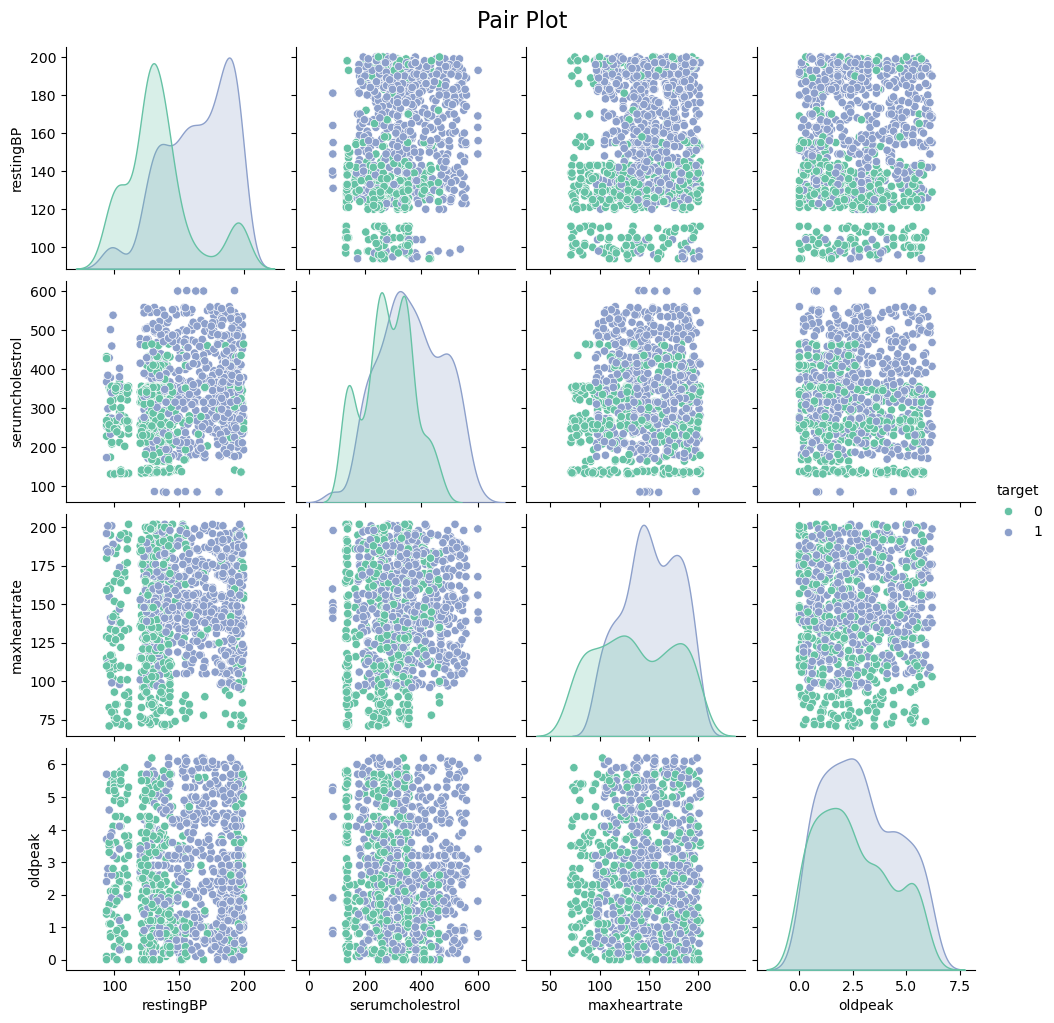

In [135]:
strong_numerical_features = [
    'restingBP',
    'serumcholestrol',
    'maxheartrate',
    'oldpeak',
    'target'
]
custom_colors = {
    0: '#66c2a5',  
    1:  "#8da0cb"
}
sns.pairplot(
    data[strong_numerical_features],
    hue='target',
    palette= custom_colors,
    diag_kind='kde'
)

plt.suptitle('Pair Plot', y=1.02, fontsize=16)
plt.show()

## **Removing Outliers Based on Boxplot Analysis**

In [136]:
outlier_features = ['restingBP', 'serumcholestrol']
for feature in outlier_features:
    upper_bound = data[feature].quantile(0.99)
    data[feature] = np.where(
        data[feature] > upper_bound,
        upper_bound,
        data[feature]
    )

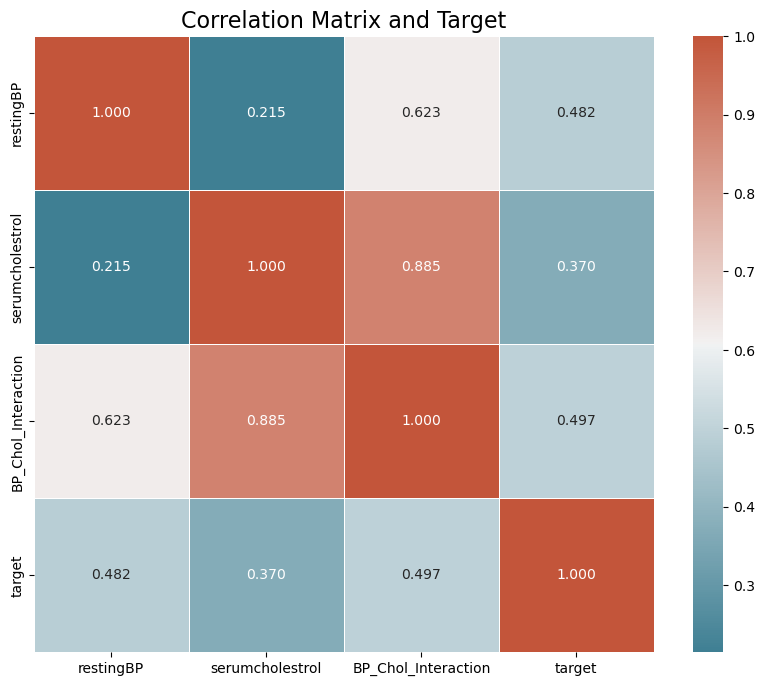

In [137]:
data['BP_Chol_Interaction'] = data['restingBP'] * data['serumcholestrol']
features_for_corr = [
    'restingBP', 
    'serumcholestrol', 
    'BP_Chol_Interaction',
    'target'
]

correlation_matrix = data[features_for_corr].corr()

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(
    correlation_matrix,
    annot=True,      
    cmap=cmap,    
    fmt=".3f",          
    linewidths=.5,      
    cbar=True           
)

plt.title('Correlation Matrix and Target', fontsize=16)
plt.show()

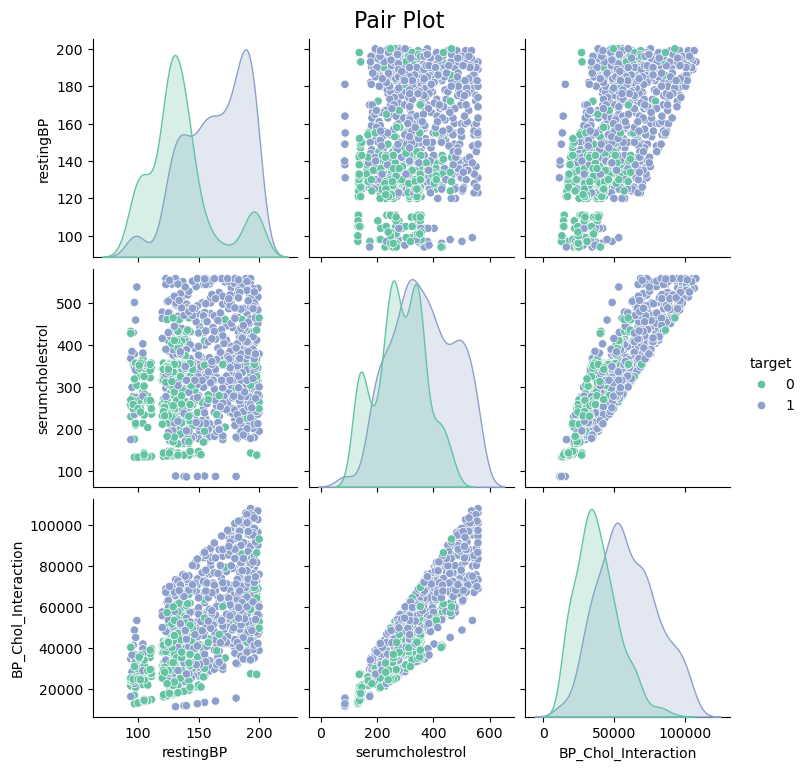

In [138]:
strong_numerical_features = [
    'restingBP',
    'serumcholestrol',
    'BP_Chol_Interaction',
    'target'
]
custom_colors = {
    0: '#66c2a5',  
    1:  "#8da0cb"
}
sns.pairplot(
    data[strong_numerical_features],
    hue='target',
    palette= custom_colors,
    diag_kind='kde'
)

plt.suptitle('Pair Plot', y=1.02, fontsize=16)
plt.show()

## **Removing skewness**

In [139]:
skewed_features = ['restingBP', 'serumcholestrol','BP_Chol_Interaction'] 

for feature in skewed_features:
    data[feature] = np.log(data[feature])

## **One hot encoding for nominal features**

In [140]:
ohe_features = ['gender', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia']
ordinal_features = ['chestpain', 'slope', 'noofmajorvessels']
data = pd.get_dummies(data, columns=ohe_features, drop_first=True)

## **Training and splitting data**

In [141]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

## **Scaling Numerical Features Using RobustScaler**
### We apply RobustScaler to the numerical features to reduce the influence of outliers and ensure consistent feature scaling.


In [142]:
from sklearn.preprocessing import RobustScaler
numerical_features = X_train.columns.difference([
    'gender_1',              # OHE
    'fastingbloodsugar_1',   # OHE
    'restingrelectro_1',     # OHE
    'restingrelectro_2',     # OHE
    'exerciseangia_1'        # OHE
])
scaler = RobustScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [143]:
X_train.head()

,age,chestpain,restingBP,serumcholestrol,maxheartrate,oldpeak,slope,noofmajorvessels,BP_Chol_Interaction,gender_1,fastingbloodsugar_1,restingrelectro_1,restingrelectro_2,exerciseangia_1
289,0.100000,-0.5,0.030469,1.075467,-0.203704,-0.530973,0.0,0.5,0.830805,True,False,True,False,True
821,-0.100000,-0.5,-0.522630,-0.519128,-0.944444,-0.849558,0.0,-0.5,-0.730553,True,True,False,False,False
66,1.000000,1.0,0.930554,-0.391009,0.370370,-0.460177,1.0,0.5,0.158850,True,True,False,True,False
190,0.766667,0.5,0.615603,1.101861,-0.018519,0.991150,0.0,0.0,1.168999,True,True,False,False,False
256,1.000000,0.5,0.497032,-0.022570,-0.425926,1.238938,0.0,0.5,0.215210,True,False,False,False,False


# **Logistic regression**

In [144]:
logist_regres = LogisticRegression()
logist_regres.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## **Accuracy**

In [145]:
Y_pred = logist_regres.predict(X_test)
accuracy_result = accuracy_score(Y_test,Y_pred) * 100

print('Accuracy : {} %'.format(accuracy_result))

Accuracy : 90.5 %


## **Observing some more metrics**

In [146]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        84
           1       0.91      0.93      0.92       116

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.91      0.90       200



## **Confusion matrix**

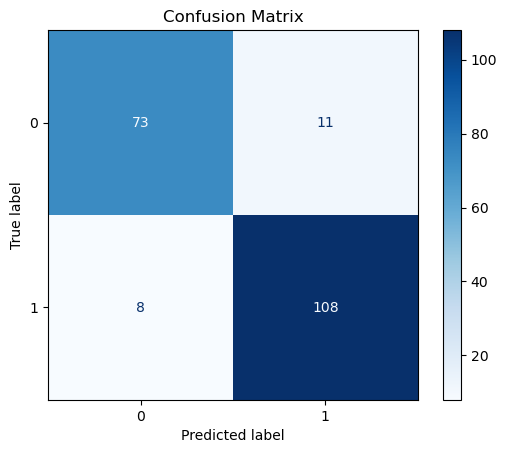

In [147]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## **ROC curve**

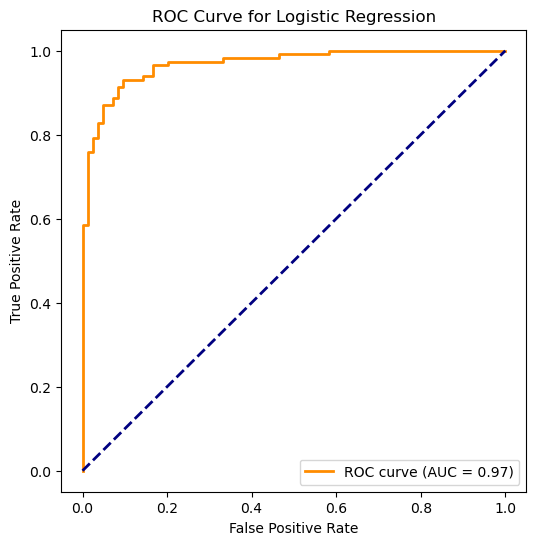

In [148]:
y_pred_prob = logist_regres.predict_proba(X_test)[:, 1]   

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()


## **K-nearest neighbor**

In [149]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, Y_train)

,n_neighbors,50
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [150]:
Y_pred_knn = knn.predict(X_test)

accuracy_result_knn = accuracy_score(Y_test,Y_pred) * 100

print('Accuracy : {} %'.format(accuracy_result))

Accuracy : 90.5 %


Не можешм подняться выше чем 90, буду искать подходящий к чтобы взлететь на луну

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

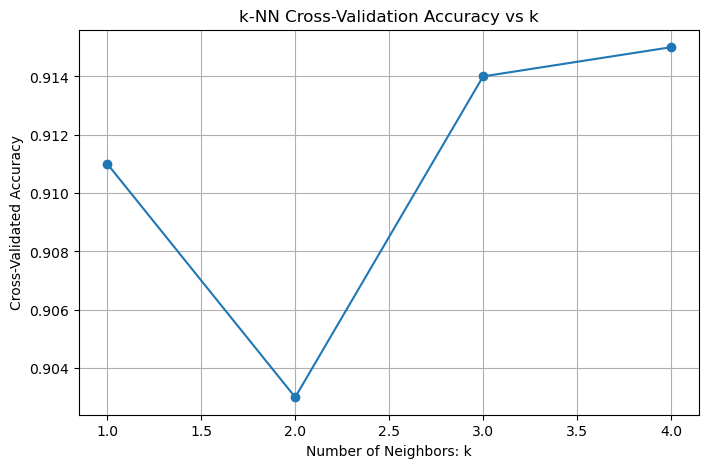

Best k from cross-validation: 4


In [152]:
k_range = range(1, 5)
cross_val_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_scaled,Y, cv=5, scoring='accuracy')
    cross_val_scores.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(k_range, cross_val_scores, marker='o')
plt.title("k-NN Cross-Validation Accuracy vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(cross_val_scores)]
print(f"Best k from cross-validation: {best_k}")

мы нашли 3, теперь попробуем потренировать с ней

In [153]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, Y_train)


,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [154]:
Y_pred_knn_bestk = best_knn.predict(X_test)

accuracy_result_knn = accuracy_score(Y_test,Y_pred) * 100

print('Accuracy : {} %'.format(accuracy_result))

Accuracy : 90.5 %


## **щит**

In [155]:
print(classification_report(Y_test, Y_pred_knn_bestk))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        84
           1       0.97      0.91      0.94       116

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



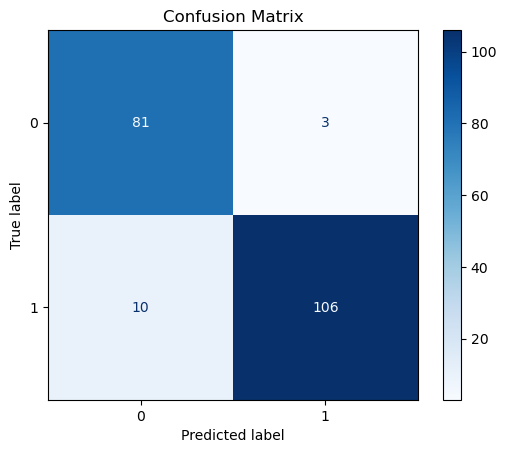

In [156]:
cm = confusion_matrix(Y_test, Y_pred_knn_bestk)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

нихуя короче не измен я спать

с новыми силами decision tree

In [157]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [158]:
Y_pred_tree = tree.predict(X_test)

accuracy_result_tree = accuracy_score(Y_test,Y_pred) * 100

print('Accuracy : {} %'.format(accuracy_result_tree))


Accuracy : 90.5 %


In [159]:
print(classification_report(Y_test, Y_pred_tree))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        84
           1       0.96      0.93      0.94       116

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



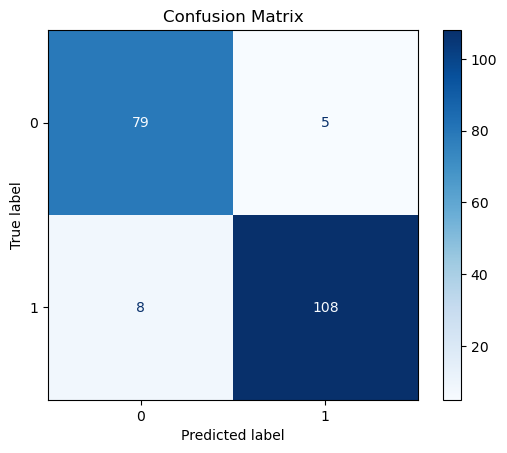

In [160]:
cm = confusion_matrix(Y_test, Y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()